In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df = pd.read_csv('Toyoto_Corrola.csv')
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [4]:
df.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [5]:
df.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


# Scatterplot between variables along with histograms

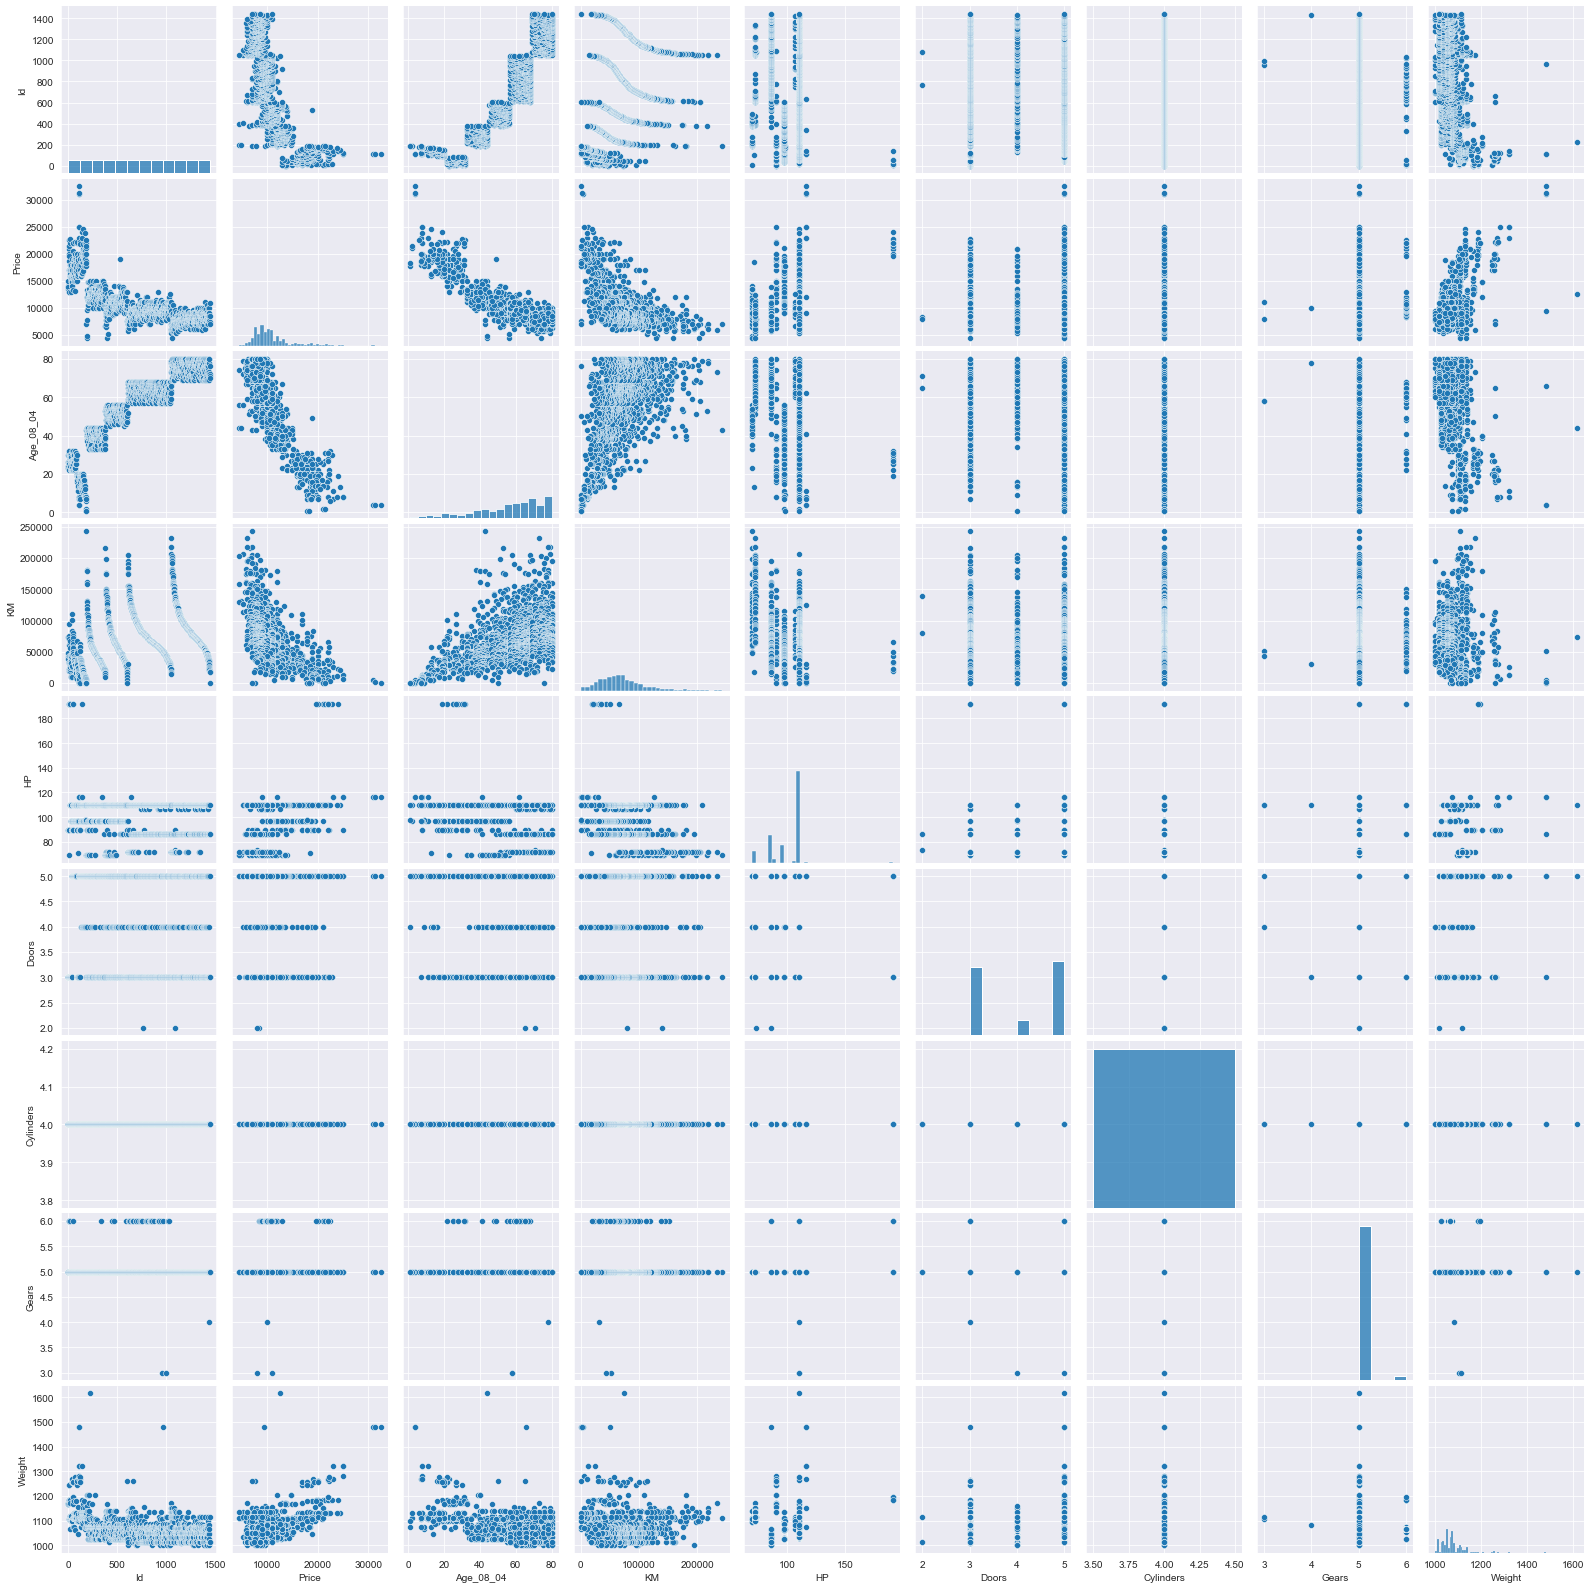

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a model

In [7]:
model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [9]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [10]:
print(model.tvalues,'\n',model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [11]:
model.rsquared, model.rsquared_adj

(0.7705372737359842, 0.7584602881431413)

# Simple Linear Regression Models

In [12]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()

print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [13]:
ml_w=smf.ols('MPG~WT', data=cars).fit()

print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [14]:
ml_wv=smf.ols('MPG~WT+VOL', data=cars).fit()

print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

In [16]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP', data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+HP+SP', data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

/Users/anand/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


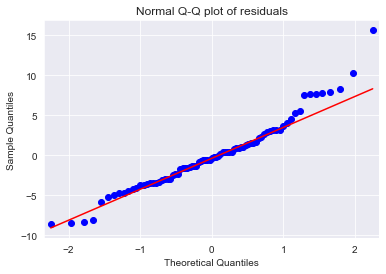

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [18]:
list(np.where(model.resid>10))

[array([ 0, 76])]

# Residual Plot for Homoscedasticity

In [19]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardized Residual values')

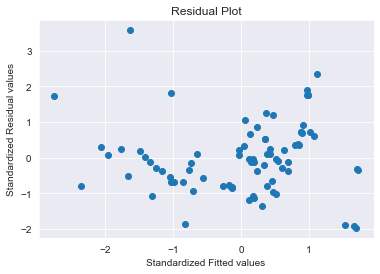

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')

# Residual vs Regressors

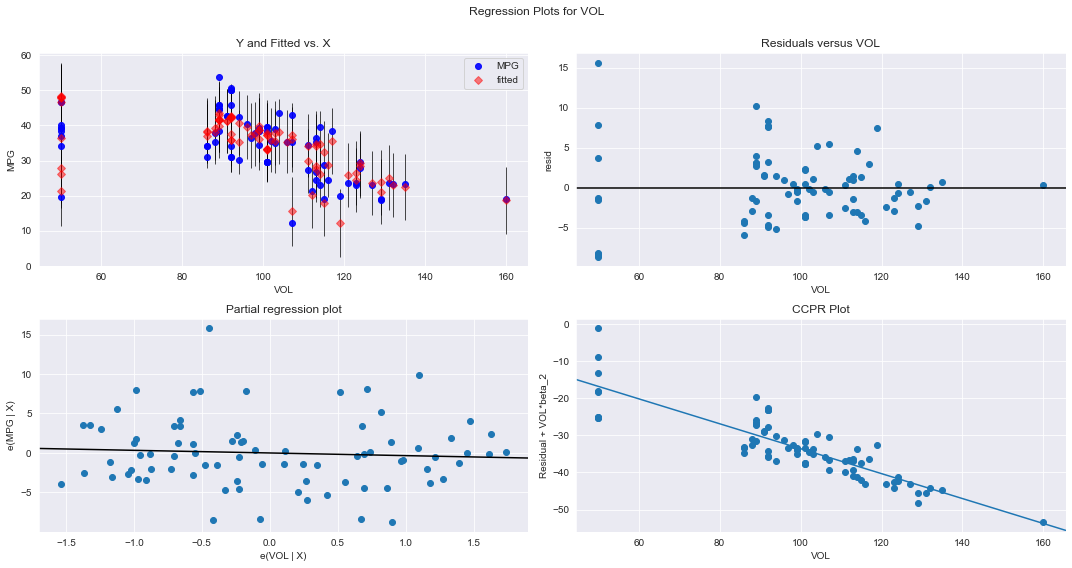

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'VOL', fig=fig)
plt.show()

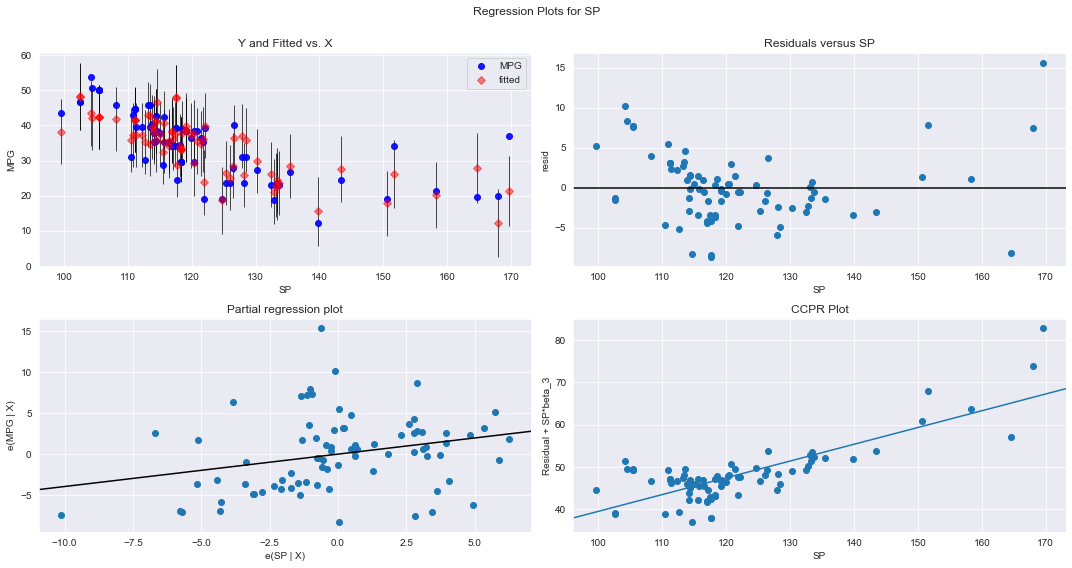

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'SP', fig=fig)
plt.show()

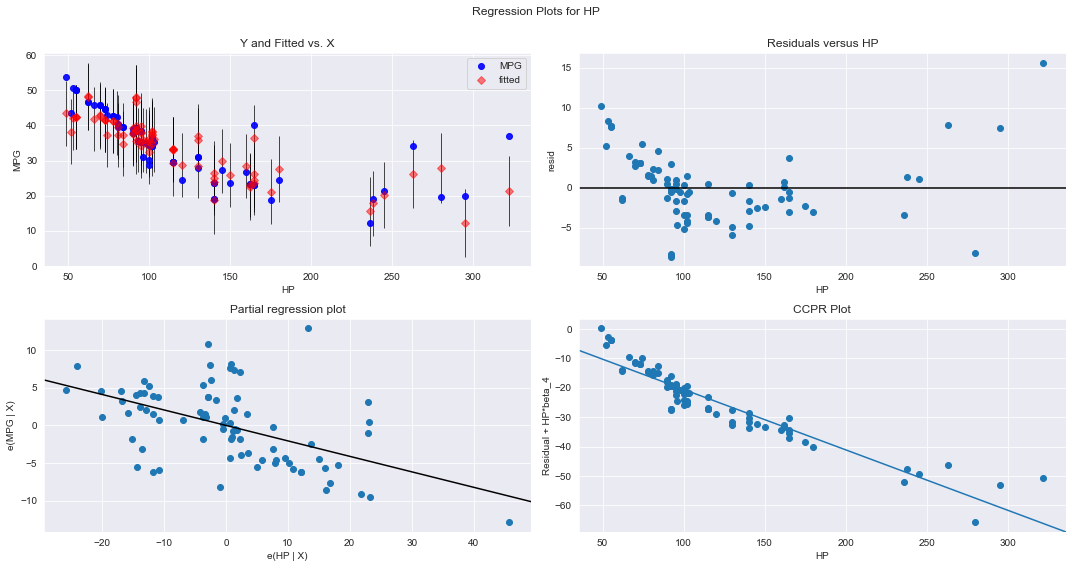

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP', fig=fig)
plt.show()

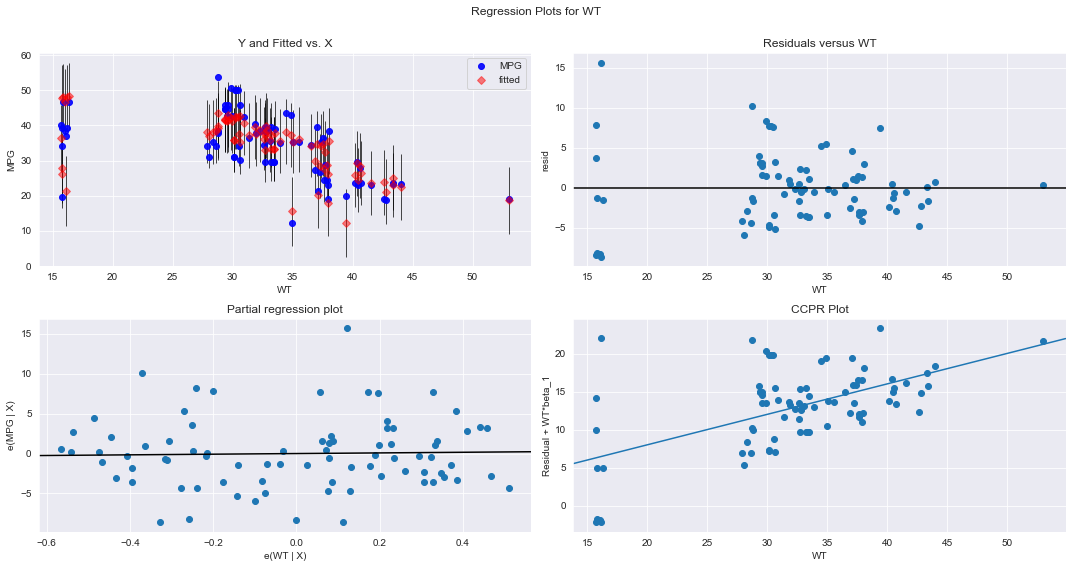

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'WT', fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook's Distance

In [25]:
model_innfluence = model.get_influence()
(c,_) = model_innfluence.cooks_distance

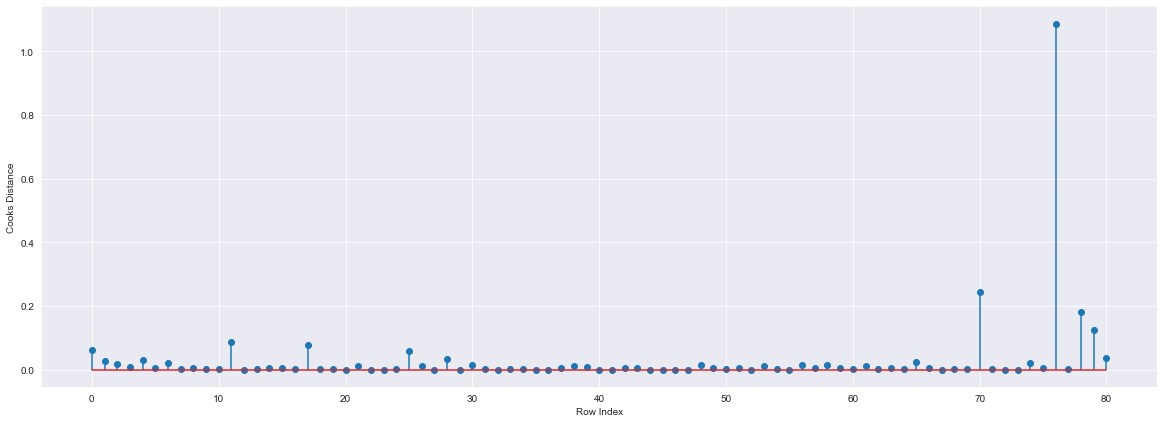

In [26]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
# Index and value of Incfluencer where c is more than .5
np.argmax(c),np.max(c)

(76, 1.0865193998180052)

# High Influence Points

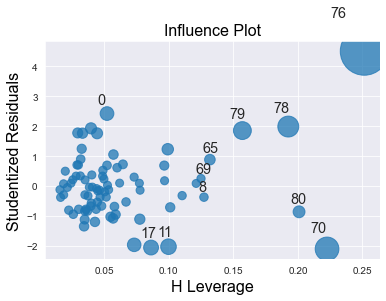

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [30]:
leverage_cutoff

0.2222222222222222

### From the above plot, it is evident that data point 70 & 76 are the influencers

In [31]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [32]:
# See the difference
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [33]:
# Read dataset again
cars_new = pd.read_csv('Cars.csv') 

In [37]:
#Discard the data points which are influencer and reassign the row number (reset_index())
car1 = cars_new.drop(cars_new.index[[70,76]], axis=0).reset_index()

In [38]:
car1.head()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149


In [39]:
# Drop the original index
car1 = car1.drop(['index'],axis=1)

In [40]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [41]:
# Exclude variable 'WT' and generate R-Squared and AIC values
final_ml_V = smf.ols('MPG~VOL+SP+HP', data = car1).fit()

In [42]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.8161692010376005, 446.11722639447737)

In [43]:
# Exclude variable 'VOL' and generate R-Squared and AIC values
final_ml_V = smf.ols('MPG~WT+SP+HP', data = car1).fit()

(final_ml_V.rsquared, final_ml_V.aic)

(0.8160034320495304, 446.18843235750313)

### Comparing above R-Square and AIC Values, model 'final_ml_V' has high R-Square & low AIC, hence include variable 'VOL' so that multicollinearity problem would be resolved

# Cook's Distance

In [44]:
model_influence_V = final_ml_V.get_influence()

c_V, _ = model_influence_V.cooks_distance

Text(0, 0.5, 'Cooks Distance')

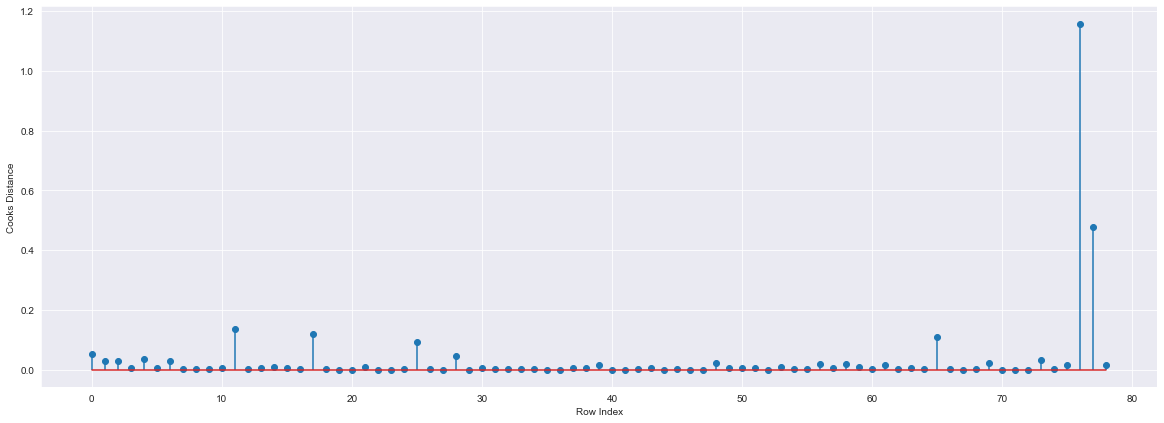

In [45]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars1)), np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [46]:
# index of the data points where c is more than .5
np.argmax(c_V), np.max(c_V)

(76, 1.1583034851747882)

In [47]:
# Drop 76 and 77 observations 
car2=car1.drop(car1.index[[76,77]], axis=0)

In [48]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [49]:
# Reset the index and re arrange the row values
car3 = car2.reset_index()

In [50]:
car4 = car3.drop(['index'],axis=1)

In [51]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [52]:
# Build the model on the new data
final_ml_V = smf.ols('MPG~VOL+SP+HP', data=car4).fit()

In [53]:
# Again check for influencers
model_influence_V = final_ml_V.get_influence()
c_V, _ = model_influence_V.cooks_distance

Text(0, 0.5, 'Cooks Distance')

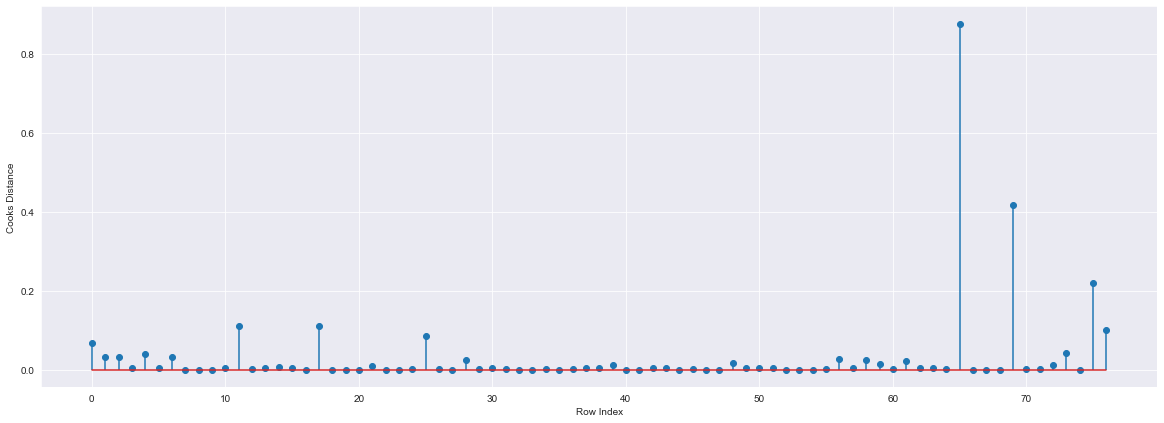

In [55]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)), np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [56]:
# index of the data points where c is more than .5
np.argmax(c_V), np.max(c_V)

(65, 0.8774556986296811)

### Since the value is < 1, we can stop the diagnostic process and finalize the model 

In [57]:
# Check the accuracy of the model
final_ml_V = smf.ols('MPG~VOL+SP+HP', data=car4).fit()

In [58]:
final_ml_V.rsquared, final_ml_V.aic

(0.8669636111859063, 409.4153062719508)

# Predicting for new data

In [59]:
# New data for prediction
new_data = pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35}, index=[1])

In [60]:
new_data

,HP,VOL,SP,WT
1,40,95,102,35


In [61]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64